# The Sparks Foundation 
# Task 1:Supervised ML
# Priya Soni

In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


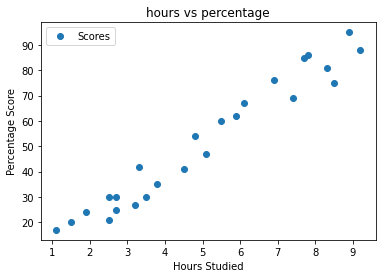

In [10]:
#plot a 2D graph to visualize our dataset and can manually find any relationship between the data
df.plot(x='Hours',y='Scores',style='o')
plt.title('hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [13]:
#from the graph above we can clearly see that there is a positive linear relation between the number of hours studied 
#and percentage of score
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values


#now that we have our attributes and labels, the mext step is to split this data into training and test sets. We will do this 
#using Scikit learns built-in train_test_spilt() method:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                            test_size=0.2,random_state=0)

In [15]:
#data got splitted into 80% training phase and 20% testing phase

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("training completed")

training completed


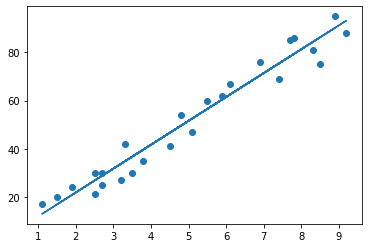

In [16]:
#we have split our data into training and testing sets and now we train our algorithm

line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [17]:
#now that we have ttrained our algorithm its time to make predictions

print(X_test) #testind data- in hours
y_pred= regressor.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
#comparing the actual output values for x-test withpredicted values

data=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
data

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
#testing with our own data

hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("no of hours ={}".format(hours))
print("predicted score = {}".format(own_pred[0]))

no of hours =9.25
predicted score = 93.69173248737535


In [21]:
#the final step is to evaluate the performance of algorithm

from sklearn import metrics
print('Mean absolute error:',
     metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.183859899002975


In [ ]:
#if a student studies for 9.25 hours per day, the model predicts the score of 93.69%